# Analysis the results

In [1]:
import argparse
import datetime
import json
import random
import time
from pathlib import Path
import os, sys
import numpy as np

import torch
from torch.utils.data import DataLoader, DistributedSampler, random_split, TensorDataset
from torch import nn
import matplotlib.pyplot as plt

In [13]:
def read_one_results(path):
    with open(path, "r") as outfile:
        data = json.load(outfile)
    return data

def write_one_results(path, json_data):
    with open(path, "w") as outfile:
        json.dump(json_data, outfile)
        
def display_data_hist(loss):
    plt.hist(loss, bins=50, label='ViT')
    plt.title('Loss Distribution')
    plt.xlabel('Loss')
    plt.ylabel('Probability Density')
    locs, _ = plt.yticks()
    plt.yticks(locs,np.round(locs/loss.shape[0],3))
    plt.legend()
    plt.show()
    
def np_read(file):
    with open(file, "rb") as outfile:
        data = np.load(outfile)
    return data
def np_write(data, file):
    with open(file, "wb") as outfile:
        np.save(outfile, data)

normalize = [0.05269893, 0.053517897]

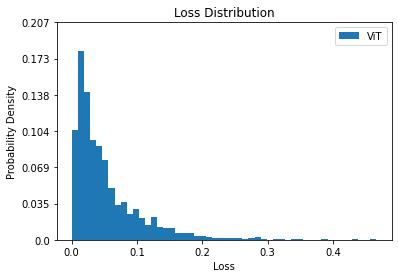

In [14]:
val_loss = np_read("/workspace/pytorch-segmentation/pro_data/PSPNet_VOC/val/image_true_losses.npy")
display_data_hist(val_loss)

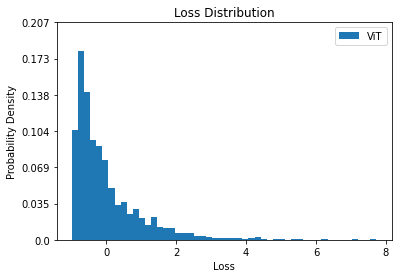

In [16]:
val_loss = (val_loss - normalize[0])/normalize[1]
display_data_hist(val_loss)

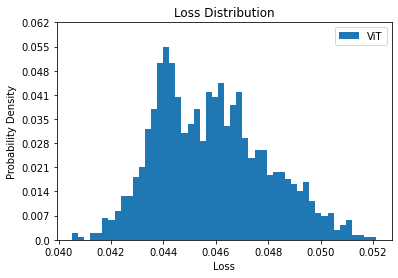

In [15]:
val_estimated_loss = np.array(read_one_results("/workspace/ViT-pytorch/output/ViT-output-PSPNet-VOC-train_losses.json")['losses'])
val_estimated_loss = val_estimated_loss * normalize[1] + normalize[0]
display_data_hist(val_estimated_loss)